<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Wednesday_Stats_Q%26A_DS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:

# prob_drunk_given_positive(1/1000,.08,1.0)


def bayes_rule(p_user, p_pos_non_user, p_pos_user):
  p_non_user = 1 - p_user

  numerator = p_pos_user*p_user
  denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)

  return (numerator / denominator)

bayes_rule(1/200, .01, 1)

0.33444816053511706

In [3]:

prior = 1/1000
p_drunk_posterior = []
for i in range(1,11):
  prior = bayes_rule(prior,.08,1)
  p_drunk_posterior.append(prior)
  
p_drunk_posterior

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

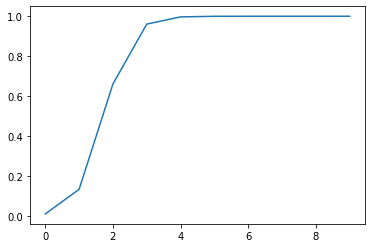

In [4]:
plt.plot(p_drunk_posterior)
plt.show()

# Chi^2 Test

We've talked about two versions of the chi^2 test:

- Goodness of fit test (1 single categorical variable) - Compare observed and expected frequencies using the chi^2 statistic (Pearson's chi^2 test).

- Test for independence - **This is the one that you really need to know**. 

## Test for Independence:

T-tests (numeric, ordinal) - need to be able to calculate a mean

Chi^2 tests - We can summarize with a crosstab (discrete, categorical)

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')

print(df.shape)
df.head(10)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


How to identify categorical variables in a dataset?

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# non-numeric categorical columns
df.describe(exclude='number')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [8]:
# waterfront is definitely categorical
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [9]:
df['condition'].value_counts().sort_index()

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

Are condition and waterfront variables independent or dependent?

1) Null Hypothesis: They are independent

2) Alternative Hypothesis: They are dependent

3) Confidence Level: 95%

- I need a Crosstab of these two categorical variables (contingency table) 

In [10]:
contingency_table = pd.crosstab(df['condition'], df['waterfront'])
contingency_table

waterfront,0,1
condition,,
1,29,1
2,171,1
3,13940,91
4,5629,50
5,1681,20


In [11]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 10.074729585287205
P-value: 0.03918751144589182
Degrees of Freedom: 4
Expected: 
 [[2.97737473e+01 2.26252718e-01]
 [1.70702818e+02 1.29718225e+00]
 [1.39251816e+04 1.05818396e+02]
 [5.63617036e+03 4.28296396e+01]
 [1.68817147e+03 1.28285291e+01]]


In [12]:
yes_waterfront = df[df['waterfront']==1]
no_waterfront = df[df['waterfront']==0]

print(yes_waterfront['condition'].mean())
print(no_waterfront['condition'].mean())

3.5337423312883436
3.4084848484848487


### Conclusion: 

Based on a chi^2 statistic of 10.07, and a p-value of .039, I (reject/fail to reject) the null hypothesis that waterfront, and condition are independent.

confidence_level = .95

1 - confidence_level = .05 (critical value)

if p < critical value (.05) -> reject

if p >= critical value (.05) -> fail to reject



### How does our chi^2 statistic result in a p-value

We consider a specific chi^2 distribution - based on our degrees of freedom.

What are our degrees of freedom in this example?

dof = (# columns -1) * (# rows -1)

1) Plot the chi^2 value on its corresponding probability distribution



In [13]:
1 - stats.chi2.cdf(10.075, 4)

0.03918309085362304

Use an old-school table:

<https://ib.bioninja.com.au/_Media/chi-table_med.jpeg>

## Review of Confidence Interval Function:

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [14]:
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  s = np.std(sample, ddof=1)
  # Standard Error
  stderr = s / np.sqrt(n)
  # University of Iowa page:
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  # What is the t-statistic that corresponds to my degrees of freedom, 
  # and a specific probability cutoff
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(t)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

confidence_interval([0,1,1,1,1,0,0,0])

2.3646242510102993


(0.05312802055102683, 0.5, 0.9468719794489732)